In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Utils

ut = Utils()

In [3]:
# Font 설정
import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/Malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [4]:
font_location = 'C:/Windows/Fonts/Malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
asia = pd.read_csv('../data/asia_cum.csv')
asia.columns = ['country', 'count']
asia['country'] = asia['country'].apply(lambda x : x.split('_')[0])
asia['count'] = asia['count'].apply(lambda x : x/10000)

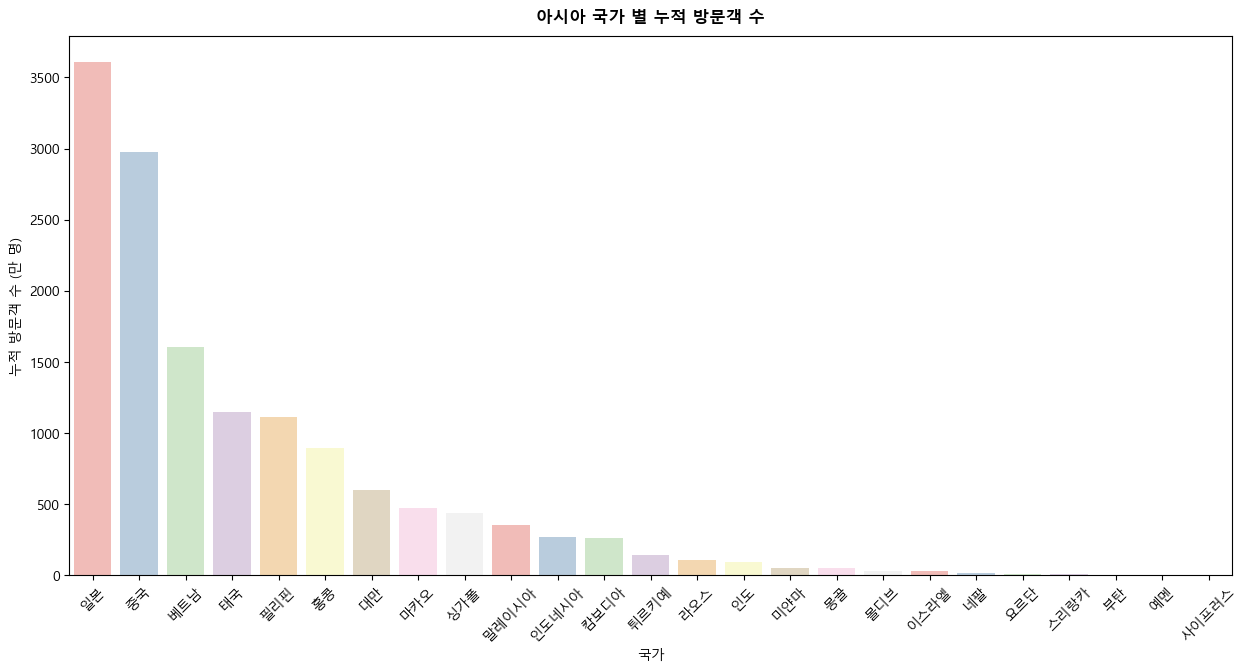

In [6]:
# 데이터 시각화 - 아시아 국가 별 누적 방문객 수
plt.figure(figsize=(15, 7))

sns.barplot(data = asia, x='country', y='count', palette='Pastel1')
plt.xlabel('국가')
plt.ylabel('누적 방문객 수 (만 명)')
plt.title('아시아 국가 별 누적 방문객 수', pad=10, fontweight='bold')
plt.xticks(rotation=45)
# plt.tight_layout()

plt.savefig('./graphs/아시아 국가 별 누적 방문객 수.png')
plt.show()

In [9]:
asia_25 = pd.read_csv('../data/asia_top25.csv')
asia_25.columns = ['country', 'count']
asia_25['country'] = asia['country'].apply(lambda x : x.split('_')[0])
asia_25['count'] = asia_25['count'].apply(lambda x : x/10000)

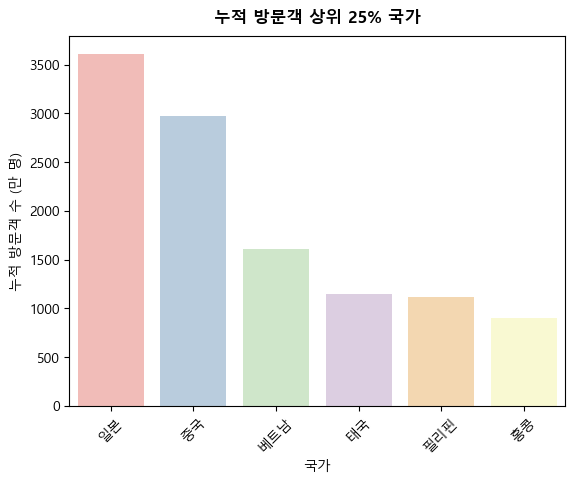

In [10]:
# 데이터 시각화 - 상위 25% 국가

sns.barplot(data = asia_25, x='country', y='count', palette='Pastel1')
plt.xlabel('국가')
plt.ylabel('누적 방문객 수 (만 명)')
plt.title('누적 방문객 상위 25% 국가', pad=10, fontweight='bold')
plt.xticks(rotation=45)
# plt.tight_layout()

plt.savefig('./graphs누적 방문객 상위 25% 국가.png')
plt.show()

In [11]:
asia_25_no = pd.read_csv('./data/asia_top25_noChina.csv')
asia_25_no.columns = ['country', 'count']
asia_25_no['country'] = asia_25_no['country'].apply(lambda x : x.split('_')[0])
asia_25_no['count'] = asia_25_no['count'].apply(lambda x : x/10000)

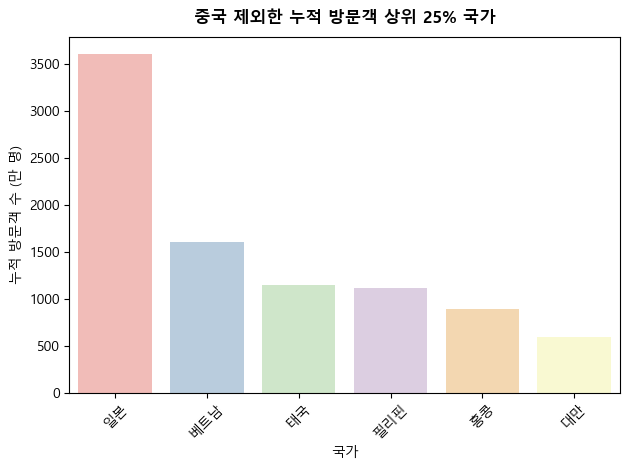

In [12]:
# 데이터 시각화 - 상위 25% 국가 (no china)

sns.barplot(data = asia_25_no, x='country', y='count', palette='Pastel1')
plt.xlabel('국가')
plt.ylabel('누적 방문객 수 (만 명)')
plt.title('중국 제외한 누적 방문객 상위 25% 국가', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs누적 방문객 상위 25% 국가(중국 제외).png')
plt.show()

In [14]:
# 유튜브 랭크 정보 가져오기
yt_rank = pd.read_csv('./data/youtuber_rank_top10.csv', encoding='utf-8-sig')

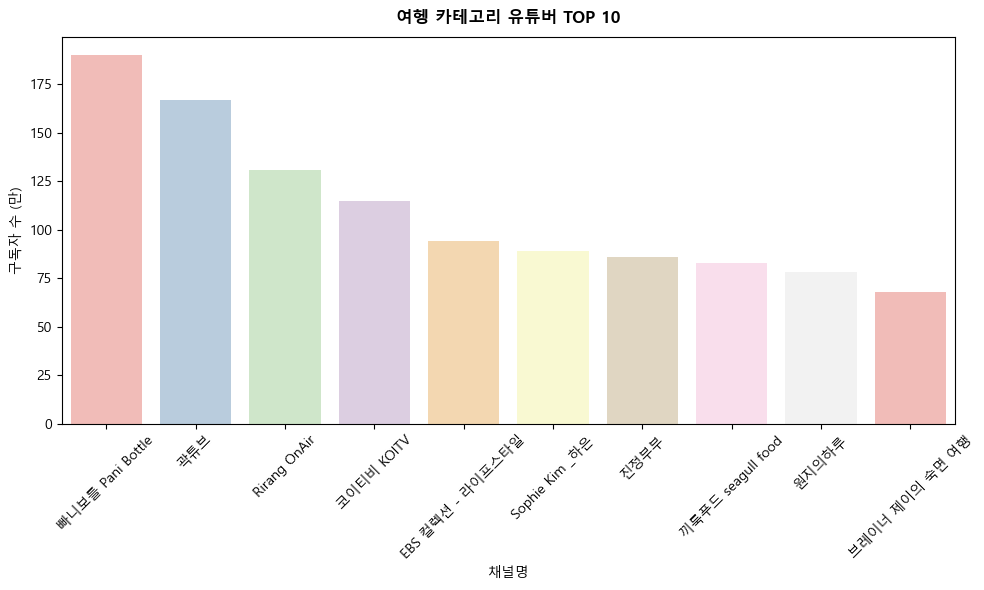

In [15]:
plt.figure(figsize=(10, 6))


sns.barplot(data=yt_rank, x='channel_name', y='subscriber (10th)', palette='Pastel1')

plt.xlabel('채널명')
plt.ylabel('구독자 수 (만)')
plt.title('여헹 카테고리 유튜버 TOP 10', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/여헹 카테고리 유튜버 TOP 10 (구독자수).png')
plt.show()

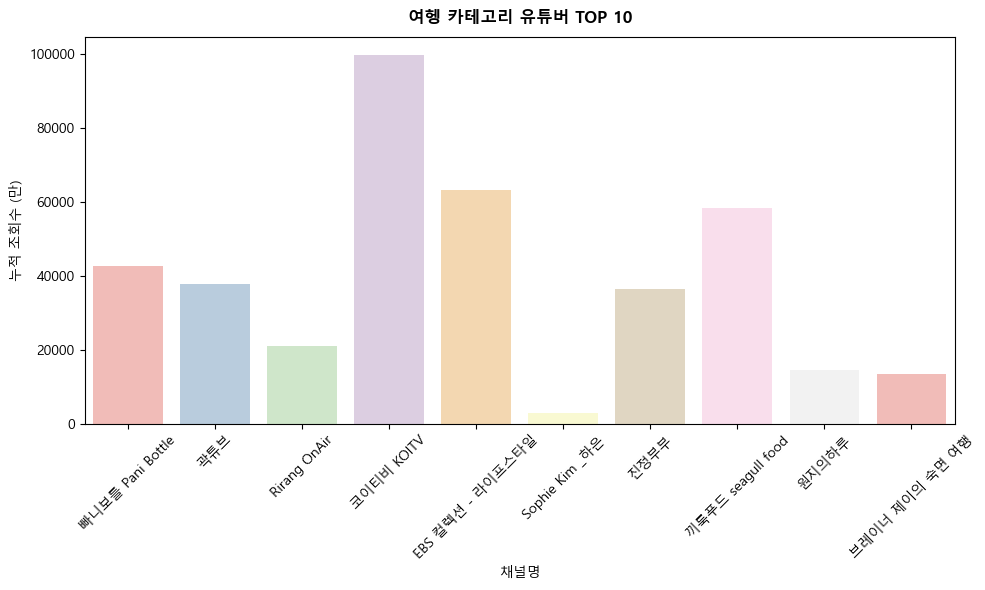

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(data=yt_rank, x='channel_name', y='cum_view (10th)', palette='Pastel1')

plt.xlabel('채널명')
plt.ylabel('누적 조회수 (만)')
plt.title('여헹 카테고리 유튜버 TOP 10', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/여헹 카테고리 유튜버 TOP 10 (누적 조회수).png')
plt.show()

In [18]:
# 사용 된 채널
used_yt = pd.read_csv('./data/used_youtuber.csv', encoding='utf-8-sig')

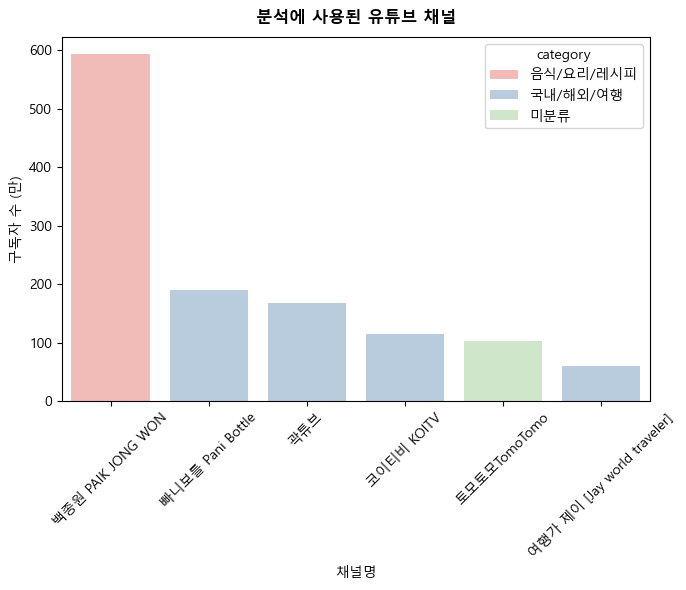

In [19]:
plt.figure(figsize=(7, 6))

sns.barplot(data=used_yt, x='channel_name', y='subscriber (10th)', palette='Pastel1', hue='category', dodge=False)

plt.xlabel('채널명')
plt.ylabel('구독자 수 (만)')
plt.title('분석에 사용된 유튜브 채널', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/분석에 사용된 유튜버 (구독자 수).png')
plt.show()

In [20]:
covid = pd.read_csv('./data/exit_covid.csv', encoding='utf-8-sig')
covid = covid.iloc[:, 1:]
covid

,국가명,해제일,year_month
0,일본,2022-09-07,2022년9월
1,대만,2022-10-13,2022년10월
2,홍콩,2022-09-26,2022년9월
3,필리핀,2022-02-10,2022년2월
4,베트남,2022-05-15,2022년5월
5,태국,2022-09-03,2022년9월


In [21]:
# 태국 유튜브 영상 정보 가져오기
thai_youtube = pd.read_csv('./data/thailand_youtube.csv', encoding='utf-8-sig')
thai_covid = covid.iloc[5, 2]

# 아시아 방문객 정보 가져오기
asia_data = pd.read_csv('../data/visitor_kor/asia_data_kor.csv')
asia_data['Year'].fillna(method='ffill', inplace=True)

In [22]:
# 영상 올린 날짜 type 변환
year, month, date = ut.changeTypeToDatetime(thai_youtube['publishedAt'])

In [23]:
# 비디오 publish 날짜의 row 추출

published_idx = ut.extractIndexOfVisitorRow(asia_data, year, month)
published_idx

225

In [24]:
# publish 전 1년과 후 1년 데이터 범위 index
start_idx = ut.extractIndexOfVisitorRow(asia_data, year-1, month)
end_idx = ut.extractIndexOfVisitorRow(asia_data, year+1, month)

In [25]:
after_data = asia_data.iloc[start_idx : end_idx]
thailand = after_data[['Year', 'month', '태국_명수']].dropna()

thailand['date'] = thailand['Year'] + thailand['month'] 

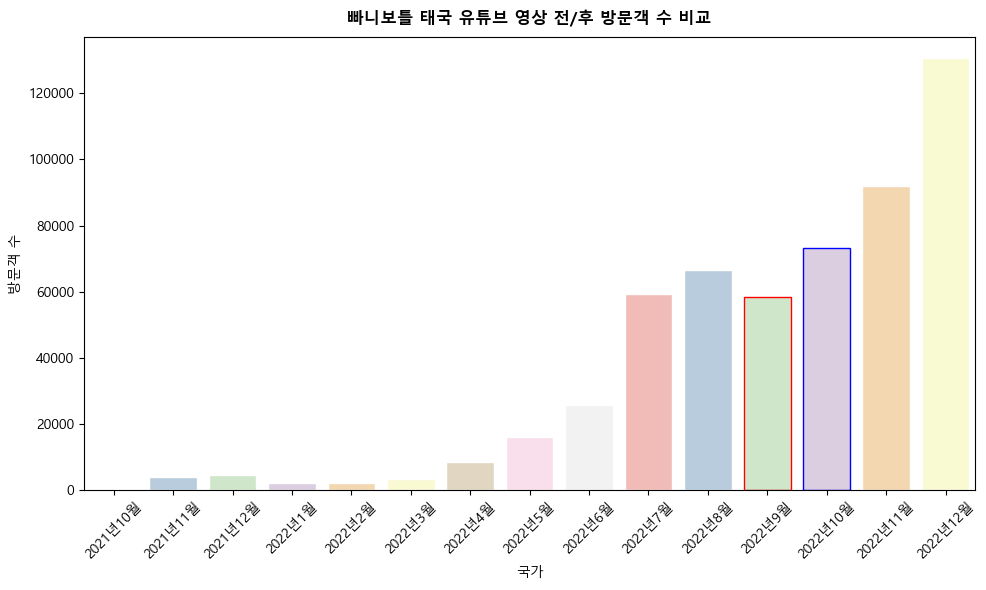

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(data = thailand, x='date', y='태국_명수', palette='Pastel1', edgecolor=['b' if x == date else 'r' if x == thai_covid else 'w' for x in thailand['date']])
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.title('빠니보틀 태국 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/태국 방문객 증감.png')
plt.show()

In [27]:
# 필리핀 유튜브 영상 정보 가져오기
phil_youtube = pd.read_csv('./data/philippines_youtube.csv', encoding='utf-8-sig')
phil_covid = covid.iloc[3, 2]

In [28]:
# 영상 올린 날짜 type 변환
year, month, date = ut.changeTypeToDatetime(phil_youtube['publishedAt'])

# 비디오 publish 날짜의 row 추출
published_idx = ut.extractIndexOfVisitorRow(asia_data, year, month)

# publish 전 1년과 후 1년 데이터 범위 index
start_idx = ut.extractIndexOfVisitorRow(asia_data, year-1, month)
end_idx = ut.extractIndexOfVisitorRow(asia_data, year+1, month)

In [29]:
after_data = asia_data.iloc[start_idx : end_idx]
phil = after_data[['Year', 'month', '필리핀_명수']].dropna()

phil['date'] = phil['Year'] + phil['month'] 

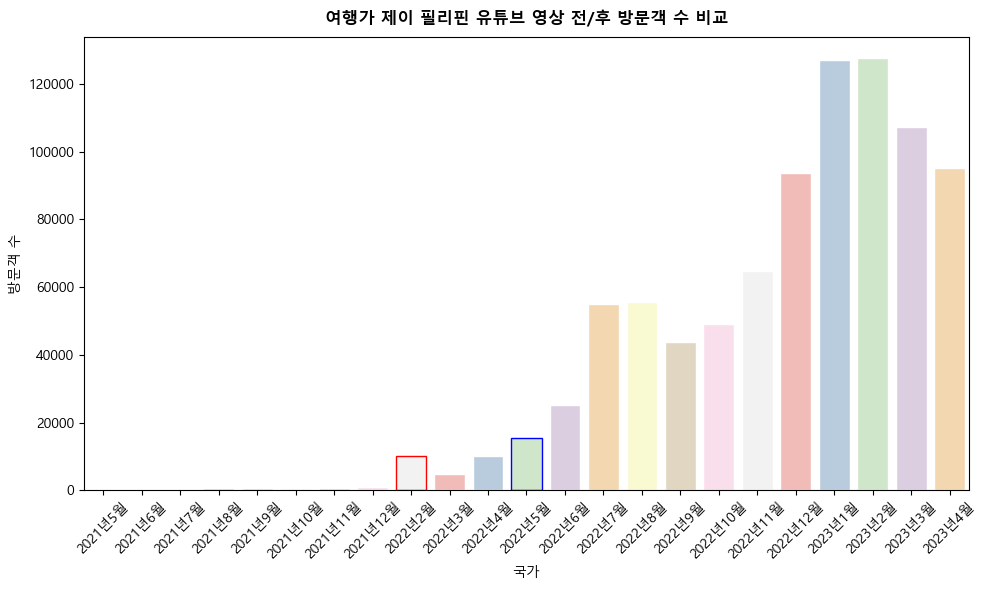

In [30]:
plt.figure(figsize=(10, 6))

sns.barplot(data = phil, x='date', y='필리핀_명수', palette='Pastel1', edgecolor=['b' if x == date else 'r' if x == phil_covid else 'w' for x in phil['date']])
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.title('여행가 제이 필리핀 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/필리핀 방문객 증감.png')
plt.show()

In [31]:
# 홍콩 유튜브 영상 정보 가져오기
hk_youtube = pd.read_csv('./data/hongkong_youtube.csv', encoding='utf-8-sig')
hk_covid = covid.iloc[2, 2]

In [32]:
# 영상 올린 날짜 type 변환
year, month, date = ut.changeTypeToDatetime(hk_youtube['publishedAt'])

# 비디오 publish 날짜의 row 추출
published_idx = ut.extractIndexOfVisitorRow(asia_data, year, month)

# publish 전 1년과 후 1년 데이터 범위 index
start_idx = ut.extractIndexOfVisitorRow(asia_data, year-1, month)
end_idx = ut.extractIndexOfVisitorRow(asia_data, year+1, month)

In [33]:
after_data = asia_data.iloc[start_idx : end_idx]
hk = after_data[['Year', 'month', '홍콩_명수']].dropna()

hk['date'] = hk['Year'] + hk['month'] 

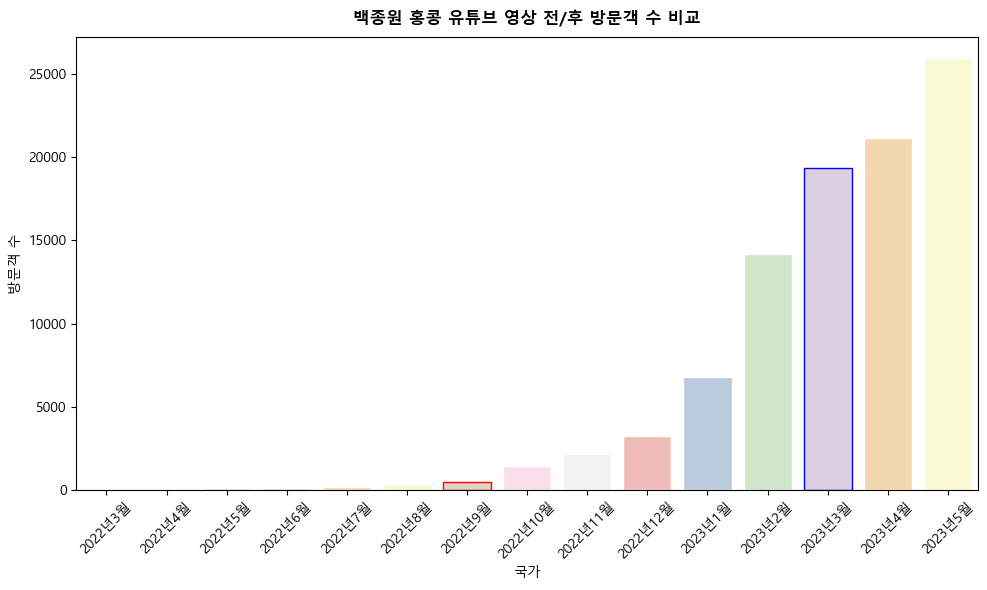

In [34]:
plt.figure(figsize=(10, 6))

sns.barplot(data = hk, x='date', y='홍콩_명수', palette='Pastel1', edgecolor=['b' if x == date else 'r' if x == hk_covid else 'w' for x in hk['date']])
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.title('백종원 홍콩 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/홍콩 방문객 증감.png')
plt.show()

In [37]:
# 대만 유튜브 영상 정보 가져오기
taiwan_youtube = pd.read_csv('./data/taiwan_youtube.csv', encoding='utf-8-sig')
taiwan_covid = covid.iloc[1, 2]

In [38]:
# 영상 올린 날짜 type 변환
year, month, date = ut.changeTypeToDatetime(taiwan_youtube['publishedAt'])

# 비디오 publish 날짜의 row 추출
published_idx = ut.extractIndexOfVisitorRow(asia_data, year, month)

# publish 전 1년과 후 1년 데이터 범위 index
start_idx = ut.extractIndexOfVisitorRow(asia_data, year-1, month)
end_idx = ut.extractIndexOfVisitorRow(asia_data, year+1, month)

In [39]:
after_data = asia_data.iloc[start_idx : end_idx]
taiwan = after_data[['Year', 'month', '대만_명수']].dropna()

taiwan['date'] = taiwan['Year'] + taiwan['month'] 

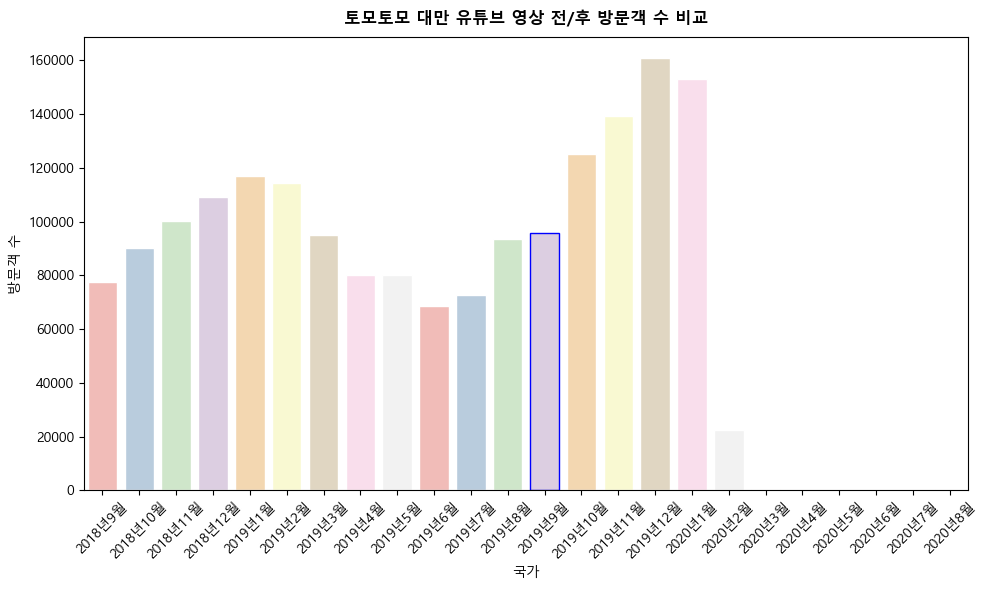

In [40]:
plt.figure(figsize=(10, 6))

sns.barplot(data = taiwan, x='date', y='대만_명수', palette='Pastel1', edgecolor=['b' if x == date else 'r' if x == taiwan_covid else 'w' for x in taiwan['date']])
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.title('토모토모 대만 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/대만 방문객 증감.png')
plt.show()

In [41]:
# 일본 유튜브 영상 정보 가져오기
japan_youtube = pd.read_csv('./data/japan_youtube.csv', encoding='utf-8-sig')
japan_covid = covid.iloc[0, 2]

In [42]:
# 영상 올린 날짜 type 변환
year, month, date = ut.changeTypeToDatetime(japan_youtube['publishedAt'])

# 비디오 publish 날짜의 row 추출
published_idx = ut.extractIndexOfVisitorRow(asia_data, year, month)

# publish 전 1년과 후 1년 데이터 범위 index
start_idx = ut.extractIndexOfVisitorRow(asia_data, year-1, month)
end_idx = ut.extractIndexOfVisitorRow(asia_data, year+1, month)

In [43]:
after_data = asia_data.iloc[start_idx : end_idx]
japan = after_data[['Year', 'month', '일본_명수']].dropna()

japan['date'] = japan['Year'] + japan['month'] 

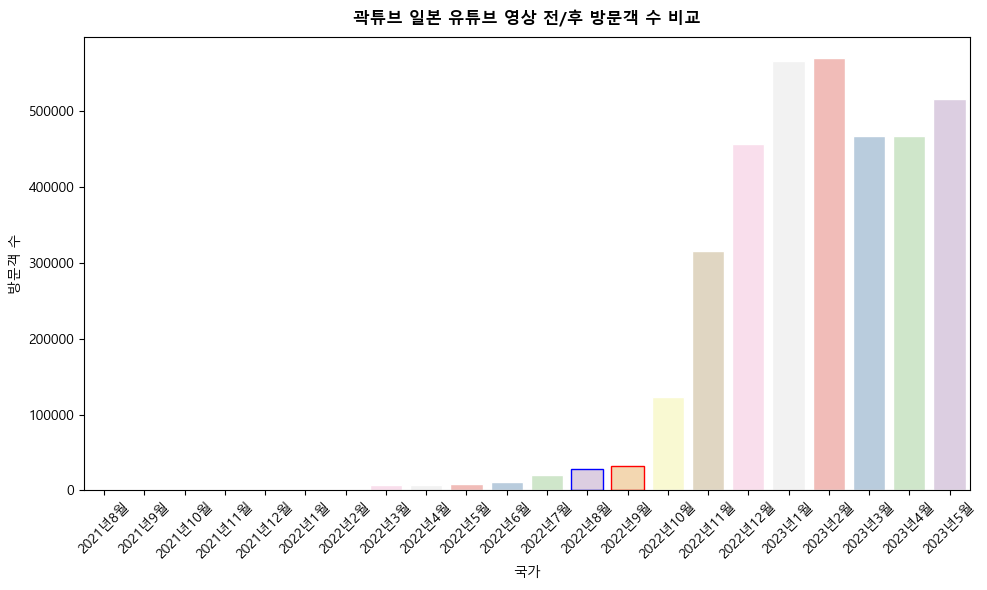

In [44]:
plt.figure(figsize=(10, 6))

sns.barplot(data = japan, x='date', y='일본_명수', palette='Pastel1', edgecolor=['b' if x == date else 'r' if x == japan_covid else 'w' for x in japan['date']])
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.title('곽튜브 일본 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/일본 방문객 증감.png')
plt.show()

In [45]:
# 베트남 유튜브 영상 정보 가져오기
viet_youtube = pd.read_csv('./data/vietnam_youtube.csv', encoding='utf-8-sig').iloc[0:1, :]
viet_covid = covid.iloc[4, 2]

In [46]:
# 영상 올린 날짜 type 변환
year, month, date = ut.changeTypeToDatetime(viet_youtube['publishedAt'])

# 비디오 publish 날짜의 row 추출
published_idx = ut.extractIndexOfVisitorRow(asia_data, year, month)

# publish 전 1년과 후 1년 데이터 범위 index
start_idx = ut.extractIndexOfVisitorRow(asia_data, year-1, month)
end_idx = ut.extractIndexOfVisitorRow(asia_data, year+1, month)

In [47]:
after_data = asia_data.iloc[start_idx : end_idx]
viet = after_data[['Year', 'month', '베트남_명수']].dropna()

viet['date'] = viet['Year'] + viet['month'] 

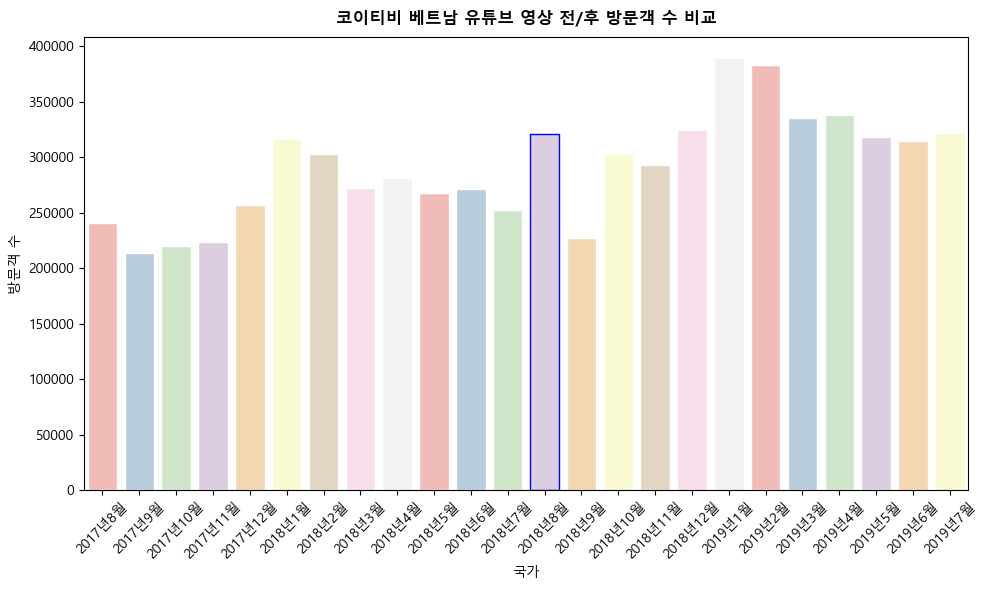

In [48]:
plt.figure(figsize=(10, 6))

sns.barplot(data = viet, x='date', y='베트남_명수', palette='Pastel1', edgecolor=['b' if x == date else 'r' if x == viet_covid else 'w' for x in viet['date']])
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.title('코이티비 베트남 유튜브 영상 전/후 방문객 수 비교', pad=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./graphs/베트남 방문객 증감.png')
plt.show()